In [2]:
#getting data from source
!wget -O breast_cancer.csv https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/breast-cancer.csv


--2021-06-06 00:02:49--  https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/breast-cancer.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124102 (121K) [text/plain]
Saving to: ‘breast_cancer.csv’

breast_cancer.csv   100%[===================>] 121.19K  --.-KB/s    in 0.004s  

2021-06-06 00:02:49 (30.4 MB/s) - ‘breast_cancer.csv’ saved [124102/124102]



## GENERAL ASSEMBLY DATA SCIENCE CHALLENGE

### Getting data from source using wget

In [3]:
#getting the headers
!wget -O header.txt https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/field_names.txt

--2021-06-06 00:02:51--  https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/field_names.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 527 [text/plain]
Saving to: ‘header.txt’

header.txt          100%[===================>]     527  --.-KB/s    in 0s      

2021-06-06 00:02:52 (46.4 MB/s) - ‘header.txt’ saved [527/527]



# PART I 


### Preliminaries and data understanding

The datsets are loaded from the source folders using wget 
Since the dataset is small and can be contained in memory, we can simply use pandas to create dataframe and load data into memory. We will add the header file to the pandas dataframe header. Then we will check for the following

1. NA check on each columns to confirm any missing data
2. Calculations on smothness and compactness of tumours
3. Normalize all numerical features
4. Split the data into hold-out Validation and training datasets

In [4]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
breast_cancer = pd.read_csv('/content/breast_cancer.csv',header=None)
header = pd.read_csv('/content/header.txt',sep=' ',header=None)
head=list(np.array(header[0]))


breast_cancer.columns =  head
breast_cancer.head(10)
#ensure there are only two possible tumour categories
assert len(breast_cancer['diagnosis'].unique()) == 2
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].astype('category')
breast_cancer_org = breast_cancer

print(f"The ratio of maligant to benign is {sum(breast_cancer['diagnosis']=='M')/sum(breast_cancer['diagnosis']=='B')}")
print('the dataset seems to be balanced')
print(f"The median smothness of malignant tumour is  {np.median(breast_cancer.smoothness_mean[breast_cancer['diagnosis']=='M'])} whilst for the benign it is {np.median(breast_cancer.smoothness_mean[breast_cancer['diagnosis']=='B'])}")

print(f"The mean smothness of malignant tumour is  {np.mean(breast_cancer.smoothness_mean[breast_cancer['diagnosis']=='M'])} whilst for the benign it is {np.mean(breast_cancer.smoothness_mean[breast_cancer['diagnosis']=='B'])}")

print(f"The median compactness of malignant tumour is  {np.median(breast_cancer.compactness_mean[breast_cancer['diagnosis']=='M'])} whilst for the benign it is {np.median(breast_cancer.compactness_mean[breast_cancer['diagnosis']=='B'])}")

print(f"The mean compactness of malignant tumour is  {np.mean(breast_cancer.compactness_mean[breast_cancer['diagnosis']=='M'])} whilst for the benign it is {np.mean(breast_cancer.compactness_mean[breast_cancer['diagnosis']=='B'])}")

#checking for null values 
breast_cancer.isnull().sum(axis = 0)


The ratio of maligant to benign is 0.5938375350140056
the dataset seems to be balanced
The median smothness of malignant tumour is  3.6795 whilst for the benign it is 1.851
The mean smothness of malignant tumour is  4.323929245283021 whilst for the benign it is 2.0003212885154085
The median compactness of malignant tumour is  0.02859 whilst for the benign it is 0.016309999999999998
The mean compactness of malignant tumour is  0.03228116509433961 whilst for the benign it is 0.02143824649859945


ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

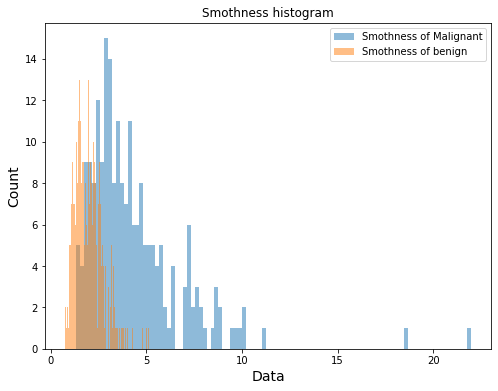

In [267]:
plt.figure(figsize=(8,6))
plt.hist(breast_cancer.smoothness_mean[breast_cancer['diagnosis']=='M'], bins=100, alpha=0.5, label="Smothness of Malignant")
plt.hist(breast_cancer.smoothness_mean[breast_cancer['diagnosis']=='B'], bins=100, alpha=0.5, label="Smothness of benign")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Smothness histogram")
plt.legend(loc='upper right')

In [268]:
 def draw_hist(f1): 
  plt.figure(figsize=(8,6))
  plt.hist(breast_cancer[f1][breast_cancer['diagnosis']=='M'], bins=100, alpha=0.5, label=f"{f1} of Malignant")
  plt.hist(breast_cancer[f1][breast_cancer['diagnosis']=='B'], bins=100, alpha=0.5, label=f"{f1} of benign")

  plt.xlabel("Data", size=14)
  plt.ylabel("Count", size=14)
  plt.title("histogram")
  plt.legend(loc='upper right')



Malignant tumours have on average larger smothness and larger compactness than benign tumours, also malignant tumours have higher variance than benign tumours. Smoothness may be one of the good indicator for classification purposes since there is a clear distinction between the two types. However it is hard to distinguish the types of tumour based on compactness features, since the data is mixed and clear discerntion is difficult. We can use non-linear methods later on to aid in this purpose

## Bootstrap Function


In [269]:
#bootstrap data
import random

def generate_bootstrap_sample(df,n_size):
  bootstrap_id = []
  for _ in range(n_size):
    bootstrap_id.append(random.randrange(0,len(df)-1))

  return df.iloc[bootstrap_id,:]

generate_bootstrap_sample(breast_cancer,10)


,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
346,898678,B,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,0.06048,0.2430,1.1520,1.5590,18.020,0.007180,0.010960,0.005832,0.005495,0.01982,0.002754,13.64,27.06,86.54,562.6,0.12890,0.13520,0.04506,0.05093,0.2880,0.08083
547,922840,B,10.26,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.024380,0.1669,0.06714,0.1144,1.0230,0.9887,7.326,0.010270,0.030840,0.026130,0.010970,0.02277,0.005890,10.83,22.04,71.08,357.4,0.14610,0.22460,0.17830,0.08333,0.2691,0.09479
478,911685,B,11.49,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.019690,0.1779,0.06574,0.2034,1.1660,1.5670,14.340,0.004957,0.021140,0.041560,0.008038,0.01843,0.003614,12.40,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180
108,86355,M,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300,0.2556,0.07039,1.2150,1.5450,10.0500,170.000,0.006515,0.086680,0.104000,0.024800,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789
37,854941,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.1700,14.160,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
321,894618,M,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.077260,0.1928,0.05096,0.5925,0.6863,3.8680,74.850,0.004536,0.013760,0.026450,0.012470,0.02193,0.001589,23.06,23.03,150.20,1657.0,0.10540,0.15370,0.26060,0.14250,0.3055,0.05933
496,914366,B,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.050740,0.1641,0.06854,0.2324,0.6332,1.6960,18.400,0.005704,0.025020,0.026360,0.010320,0.01759,0.003563,14.38,22.15,95.29,633.7,0.15330,0.38420,0.35820,0.14070,0.3230,0.10330
201,877989,M,17.54,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.074880,0.1506,0.05491,0.3971,0.8282,3.0880,40.730,0.006090,0.025690,0.027130,0.013450,0.01594,0.002658,20.42,25.84,139.50,1239.0,0.13810,0.34200,0.35080,0.19390,0.2928,0.07867
272,8910988,M,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.108800,0.1721,0.06194,1.1670,1.3520,8.8670,156.800,0.005687,0.049600,0.063290,0.015610,0.01924,0.004614,28.19,28.18,195.90,2384.0,0.12720,0.47250,0.58070,0.18410,0.2833,0.08858
85,8612399,M,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.087950,0.2132,0.06022,0.6997,1.4750,4.7820,80.600,0.006471,0.016490,0.028060,0.014200,0.02370,0.003755,22.93,27.68,152.20,1603.0,0.13980,0.20890,0.31570,0.16420,0.3695,0.08579


Visulization of two features. In order to avoid inital bias, we will use random forest model to calculate feature importance values for all features and then select two of the most important features based on the model. Similarly we will first normalize the data for later modeling purposes

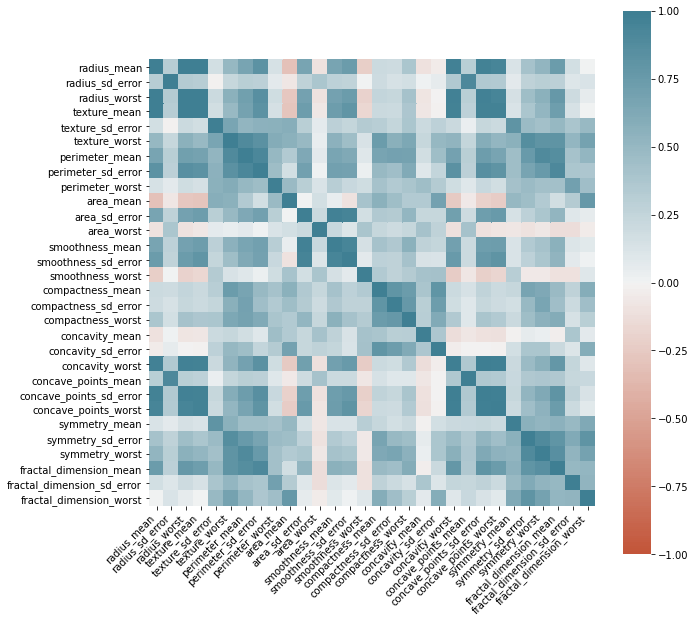

In [140]:
import seaborn as sns
numeric_data = breast_cancer.drop(columns=['diagnosis','ID'])
numeric_data = numeric_data


from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_object_dtype, is_numeric_dtype,is_string_dtype
from sklearn_pandas import DataFrameMapper

# we will normalize the datasets 
Scale_mapper = [([n],StandardScaler()) for n in numeric_data.columns if is_numeric_dtype(numeric_data[n])]
mapper_func = DataFrameMapper(Scale_mapper).fit(numeric_data)
numeric_data[mapper_func.transformed_names_] = mapper_func.transform(numeric_data)
corr = numeric_data.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


The heat map shows families of features such as concavity and compactness are generally correlated. This may impact our modelling later on, such as logistic regression, also many of the features do not show typical normal distribution but are heavily skewed, this will also have an impact on our modelling choices, since the requirements for regression analysis may not be met. Alternately we can use Random forest or other greedy algorithms for such cases

In [141]:
breast_cancer = pd.concat([breast_cancer[['diagnosis']], numeric_data], axis=1)

def splitter(df,no_rows): return df[:no_rows].copy(), df[no_rows:].copy()

n_valid = int(0.3*len(breast_cancer))  
n_trn = len(breast_cancer)-n_valid
y = breast_cancer['diagnosis']
X = breast_cancer.drop(columns=['diagnosis'])
X_train, X_valid = splitter(X, n_trn)
y_train, y_valid = splitter(y, n_trn)
X_train.shape, y_train.shape, y_valid.shape, X_valid.shape



((399, 30), (399,), (170,), (170, 30))

In [142]:
from sklearn.metrics import f1_score,log_loss,accuracy_score
from sklearn.ensemble import RandomForestClassifier
def score(x,y): return f1_score(y,x,average='macro')
def print_score(m):
    res = [score(m.predict(X_train), y_train),
           score(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
m = RandomForestClassifier(n_jobs=-1,bootstrap=True)
m.fit(X_train, y_train)
print_score(m)
valid_probs = m.predict_proba(X_valid)

score = log_loss(y_valid, valid_probs)
print(score)
print(f'accuracy is {accuracy_score(m.predict(X_valid),y_valid)}')

[1.0, 0.9601518916131453, 1.0, 0.9705882352941176]
0.1153989059797175
accuracy is 0.9705882352941176


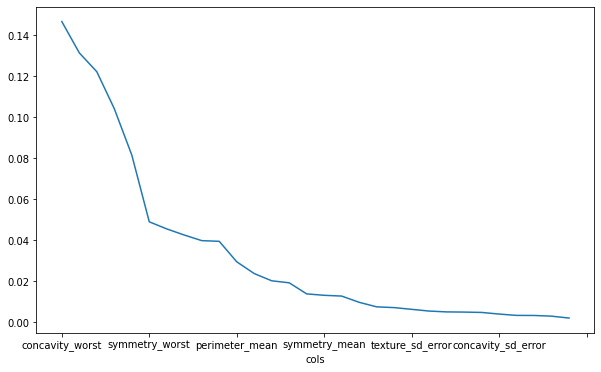

In [143]:
def rf_feat_importance(m, df):
    """ Create a pandas.DataFrame of feature importances.
    """
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(m, X); fi[:10]
fi.plot('cols', 'imp', figsize=(10,6), legend=False)

In [144]:
fi
#top features which can aid in classification of the two types of tumours

,cols,imp
20,concavity_worst,0.146776
27,fractal_dimension_mean,0.131483
22,concave_points_sd_error,0.122281
7,perimeter_sd_error,0.104216
23,concave_points_worst,0.081606
26,symmetry_worst,0.048961
13,smoothness_sd_error,0.045494
3,texture_mean,0.042514
2,radius_worst,0.039771
0,radius_mean,0.039434


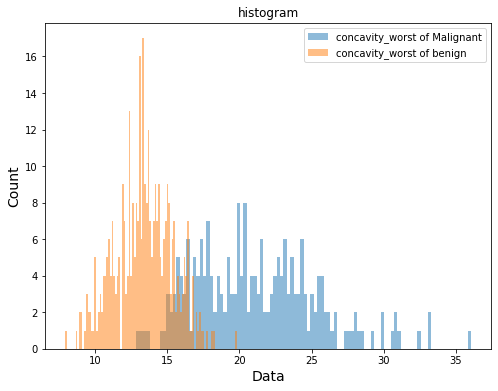

In [270]:
#concavity_worst seems like a good indicator as it provides clear distinction between two classes
def draw_hist(f1): 
  plt.figure(figsize=(8,6))
  plt.hist(breast_cancer_org[f1][breast_cancer['diagnosis']=='M'], bins=100, alpha=0.5, label=f"{f1} of Malignant")
  plt.hist(breast_cancer_org[f1][breast_cancer['diagnosis']=='B'], bins=100, alpha=0.5, label=f"{f1} of benign")

  plt.xlabel("Data", size=14)
  plt.ylabel("Count", size=14)
  plt.title("histogram")
  plt.legend(loc='upper right')

draw_hist('concavity_worst')

From the histogram, at around a value of 18 units of concavity_worst it is might be possible to draw a classifer line to distinguish the two classes. It seems that for malignant tumour the concavity of tumour increases significantly

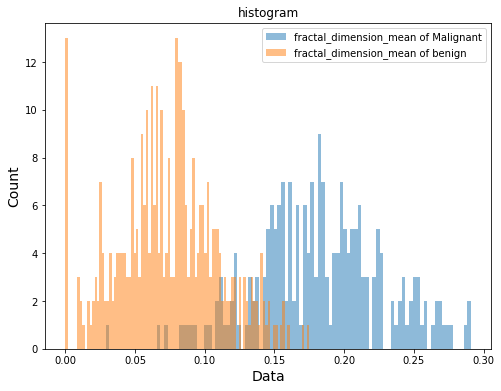

In [271]:
draw_hist('fractal_dimension_mean')

Similar to above at around a value of 0.15 units of fractal_dimension it is easier to draw a classifer line to distinguish the two classes. It seems that for malignant tumour the fractal dimensionality of tumour increases significantly

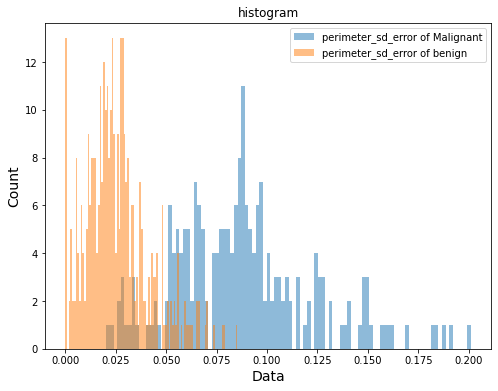

In [294]:
draw_hist('perimeter_sd_error')


Similar to above at around a value of 125 units of this feature it is easier to draw a classifer line to distinguish the two classes. It seems that for malignant tumour variance of concavity increases

# Modelling 

In [16]:
#variables_identified = ['concavity_worst','fractal_dimension_mean','concave_points_sd_error']
#breast_cancer_simplified = breast_cancer[variables_identified]
def splitter(df,no_rows): return df[:no_rows].copy(), df[no_rows:].copy()
n_valid = int(0.3*len(breast_cancer))  
n_trn = len(breast_cancer)-n_valid
y = breast_cancer['diagnosis']
#perimeter mean seems to reduce the final accuracy and hence is removed
X = breast_cancer.drop(columns=['diagnosis','perimeter_mean'])
X_train, X_valid = splitter(X, n_trn)
y_train, y_valid = splitter(y, n_trn)
X_train.shape, y_train.shape, y_valid.shape, X_valid.shape


((399, 30), (399,), (170,), (170, 30))

#### Now we will start creating the following models
1. LogisticRegression
2. Support vector machines 
3. Random Forests
4. XGboosts

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score,log_loss,accuracy_score
from sklearn.ensemble import RandomForestClassifier
metrics = {}

metrics['logistic']  = log_loss(y_valid,LogisticRegression(random_state=0,penalty='l2').fit(X_train, y_train).predict_proba(X_valid))

metrics['SVM']  = log_loss(y_valid,SVC(gamma='auto',probability=True,C=5).fit(X_train, y_train).predict_proba(X_valid))

m = RandomForestClassifier(n_jobs=-1,n_estimators=500,max_features=0.5, max_leaf_nodes=10)
m.fit(X_train, y_train)
valid_probs = m.predict_proba(X_valid)

metrics['RandomForest'] = log_loss(y_valid, valid_probs)



import xgboost as xgb
bst = xgb.XGBClassifier(
    max_depth=10,\
    n_estimators=300,
    max_leaf_nodes=0.5,
    reg_lambda=5,
    learning_rate=0.4991\
) 

bst.fit(X_train,
        y_train,
        verbose=False,
        eval_metric=['mlogloss'],

        # multiclass logloss...
        # already default with latest release
        # early_stopping_rounds=10,
        # initial attempt at early stopping, 
        # hold for now
        )

preds = bst.predict(X_valid) 
preds_sub = bst.predict_proba(X_valid)

metrics['XGBoost'] = log_loss(y_valid,preds_sub)


print(metrics)

{'logistic': 0.6962055108126929, 'SVM': 0.6298324812812466, 'RandomForest': 0.11157053552973385, 'XGBoost': 0.04646784131605005}


In [ ]:
fig, axs = plt.subplots(2)
lr = LogisticRegression(random_state=0,penalty='l2').fit(X_train, y_train)

pd.Series(abs(lr.coef_[0]), index=numeric_data.columns).nlargest(10).plot(kind='barh',ax=axs[0])
svm = SVC(gamma='auto',probability=True,C=5,kernel='linear').fit(X_train, y_train)
pd.Series(abs(svm.coef_[0]), index=numeric_data.columns).nlargest(10).plot(kind='barh',ax=axs[1])


NameError: ignored

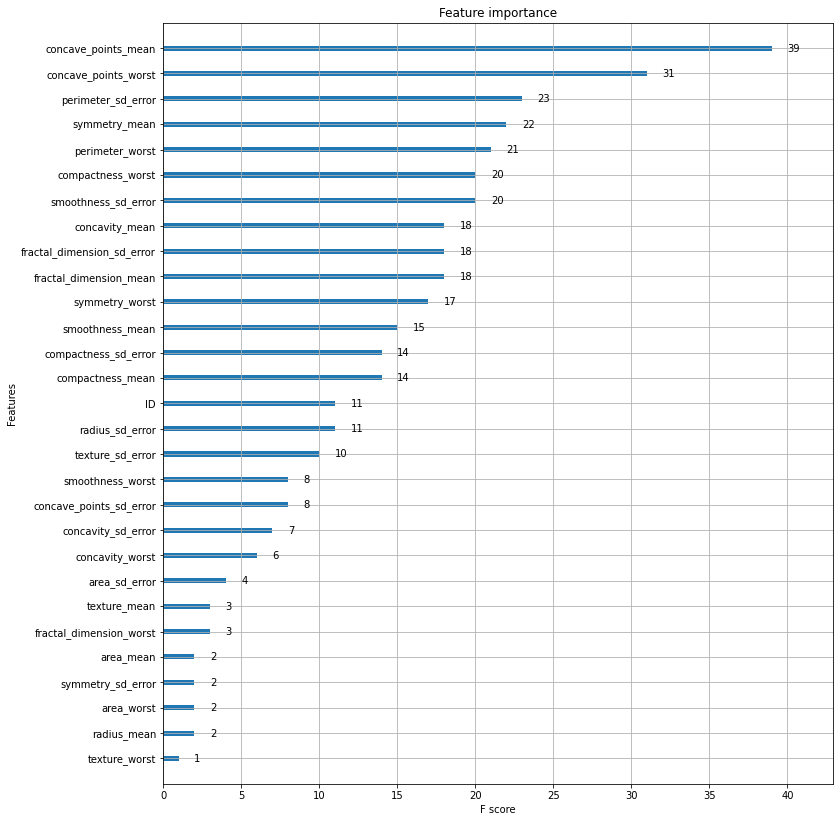

In [10]:

fig, ax = plt.subplots(figsize=(12, 14))
xgb.plot_importance(bst, ax=ax); 
fi = rf_feat_importance(m, X)
fi.plot('cols', 'imp', figsize=(10,6), legend=False)

### List of features based on Random forest model importance ranking

In [291]:
fi

,cols,imp
22,concave_points_sd_error,0.308047
27,fractal_dimension_mean,0.151598
23,concave_points_worst,0.126971
7,perimeter_sd_error,0.117933
20,concavity_worst,0.116313
26,symmetry_worst,0.022533
21,concave_points_mean,0.021416
24,symmetry_mean,0.019818
6,perimeter_mean,0.017394
1,radius_sd_error,0.016683


Final Log Loss of the models

In [26]:
print(metrics)
preds = bst.predict(X_valid)
print(f'final accuracy is {accuracy_score(preds,y_valid)}')

{'logistic': 0.6962055108126929, 'SVM': 0.6298324812812466, 'RandomForest': 0.11157053552973385, 'XGBoost': 0.04646784131605005}
final accuracy is 0.9823529411764705


### Summary of Modelling Analysis


1. Models
In the above analysis we have used four models to compare and contrast the performance of models with each other and on the training dataset. We have created a validation dataset to test for various hyper parameters and to check for overfitting related issues
Models used
i. Logistic regression
ii. Support vector Machines
iii. Extreme Boosted Trees
iv. Random Forest

As discussed above the performance of logistic regression was impacted by the highly correlated features in the data. However since it is a linear model and the decision boundry is non-linear it might not perform best on this dataset.

Support vector Machines is also a kind of linear model but performs well when using a gaussian kernel.

Ensemble learning methods such as Random Forest and XGBoost performs well.Random forest method perfoms poorly due to correlated features and less variance among features
XGBoost performed best with the final log loss of 0.046 accuracy of 98.2%. Logistic regression performed the worst

2. Loss Function
In the above analysis log-loss or binary classifier log loss was used as a metric to determine the performance of various classifiers. 

3. Overfitting and model performance is controlled by comparing the trained model on train set with validation set and then tuning the hyper parameters such as L1,L2 regularization loss coeff., tree depths, splitting crieteria etc.

4. Most imporant features based on XGboost
a. concave_points_mean
b. Smoothness_std_error


### Technical Analysis



In the above analysis four models were used to classify the two types of tumours.

Final accuracy of the classifers can improved by the following 
1. Provision of more richer features in the data-set, lesser correlated features. Overall the model was trained on the following properties of tumour
a. radius
b. perimeter
c. area
d. smoothness
e. convaity
f. symmetry
g. fractal dimension


Other features related to patient such age of the patient, type of co-related diesases can also improve the classification accuracy
2. Higher cardinality in the feature set to allow more splitting points for the trees and less variance
3. More training examples and larger data sets
4. Further analysis can be performed to combine the multiple correlated features and create new and richer features for incremental gains in model log-loss score and accuracy
5. Grid search algorithms can be used for XGBoost hyper paramater optimization for incremental further improvement in model accuracy. Mixture models on multiple classifiers can also be tried since each classifier ranks features differntly.
6. CNN or deepnets can be used to train on images directly rather than properties of the tumour 

In conclusion, the classification analysis for maligant tumour detection for breast cancer patients show that some factors play a significant role in the detection of malignant tumours. The following factors are of more significance

1. concavity related features such as mean concavity of the tumour etc.
2. fractal dimensions related features of the tumour
3. std error of perimeter of the tumour

# PART 2
### Comments on the code are as follows

## STUDENT RESPONSE 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

1. Code


a.The student is importing the sklearn packages incorrectly instead of 
'from sklearn import LinearRegression'
it should be 'from sklearn.linear_model import LinearRegression'

b. variable d is never used and data is never loaded in memory

c. naming conventions can be used a little better for more clarity

d. further sklearn API usage mistakes in model evaluation part


2. Methodology

a. Preprocessing and data cleaning part is completely missed e.g. 
x2 = pd.get_dummies simply ignores the missing NAs found in ContractType variable. Also NAs are not handled at all

b. No exploratory analysis done on the features

c. One one variable is used in Modeling leading to poor score overall

d. No hold out test set is used

e. Other metrics such as rmse may be used for comparisons. The data may be bootstrapped for removing any temporal bias


3. Concept understanding

a. usage of 'mean_absolute_error' instead of 'neg_mean_absolute_error' which is expected since the sklearn ranks cross validations from highest to lowest in term of higher values

b. CV must be greater than 1 for any cross validation to take place

c. Too few variable used in the model, more models needs to be trained to create baseline performance scores. 

## STUDENT RESPONSE 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

1. Code

a.The module sklearn.cross_validation is depreceated with new class of sklearn.model_selection


b. naming conventions can be used a little better for more clarity




2. Methodology

a. Preprocessing and data cleaning part is completely missed e.g. 
 pd.get_dummies simply ignores the missing NAs found in ContractType variable. Also NAs are not handled at all

b. No exploratory analysis done on the features

c. One one variable is used in Modeling leading to poor score overall

d. No hold out test set is used

e. Other metrics such as rmse may be used for comparisons. The data may be bootstrapped for removing any temporal bias


3. Concept understanding

a. usage of 'mean_absolute_error' instead of 'neg_mean_absolute_error' which is expected since the sklearn ranks cross validations from highest to lowest in term of higher values

b. Too few variable used in the model, only 1 model trained, more models needs to be trained to create baseline performance scores 